# Predicting Heart Disease Using Classification Models

This project makes use of various Python-based machine learning and data science libraries, in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.
Predicting heart disease is a classification problem due to the results being non-continuous. Thus, classification models will be used.

## 1. Problem Definition

> Given patient data which contains their medical attributs, can we successfully predict the likelihood of them having heart disease?

## 2. Data

The Heart Disease Dataset is originally from the Cleveland database from UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+disease

The dataset used in this notebook is a formatted version of the Heart Disease Dataset found on Kaggle.
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation 

> The project will be deemed a success if the models can reach 95% accuracy at predicting whether or not someone has heart disease.

## 4. Features

The following is a brief rundown on the meaning of the features and labels of the dataset.

##### Heart Disease Data Dictionary: 

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
    * 0: typical angina
    * 1: atypical angina
    * 2: non-anginal pain
    * 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is a cause for concern
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dl signals diabetes
7. restecg: resting electrocardiographic results
    * 0: normal
    * 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    * 0: upsloping: better heart rate with exercise (uncommon)
    * 1: flat: minimal change (typical healthy heart)
    * 2: downsloping: signs of unhealthy heart
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: thalium stress result
    * 1,3 = normal 
    * 6 = fixed defect 
    * 7 = reversable defect
14. target: has heart disease (1 = true; 0 = false)


The variable `data_dict` will store this dictionary and can be called at anytime throughout the project.

## Import  Necessary Tools

In [10]:
# EDA and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Models from Scikit-learn 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

#### Data Dictionary

In [11]:
data_dict = {
     "age": "age in years",
     "sex": "sex (1 = male; 0 = female)",
     "cp": "chest pain type ( 0.typical angina, 1.atypical angina, 2.non-anginal pain, 3.asymptomatic)",
     "trestbps": "resting blood pressure (in mm Hg on admission to the hospital)",
     "chol": "serum cholestoral in mg/dl (above 200 is a cause for concern)",
     "fbs": "(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)(> 126 mg/dl signals diabetes)",
     "restecg": "resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)",
     "thalach": "maximum heart rate achieved",
     "exang": "exercise induced angina (1 = yes; 0 = no)",
     "oldpeak": "ST depression induced by exercise relative to rest",
     "slope": "the slope of the peak exercise ST segment (0 = upsloping: better heart rate with exercise (uncommon), 1 = flat: minimal change (typical healthy heart), 2 = downsloping: signs of unhealthy heart)",
     "ca": "number of major vessels (0-3) colored by flourosopy",
     "thal": "thalium stress result (1,3 = normal, 6 = fixed defect, 7 = reversable defect)",
     "target": "has heart disease (1 = true; 0 = false)"
    }

## Import data and perform EDA

#### EDA Objectives:
1. Find data types
2. Find missing values
3. Find outliers (if any)
4. Find how certain features correlate
5. Which feature values are more likely to indicate target value of 1 (Positive heart disease case)
6. Visualize patterns through interpretive plots

In [12]:
df = pd.read_csv("data/heart-disease.csv")
df.shape

(303, 14)

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [15]:
# Make sure features and labels are numerical
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [16]:
# Check for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [17]:
# Describe data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Total Positive (1) vs. Negative (0) Cases in Entire Dataset

In [18]:
# Find sum of target values
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

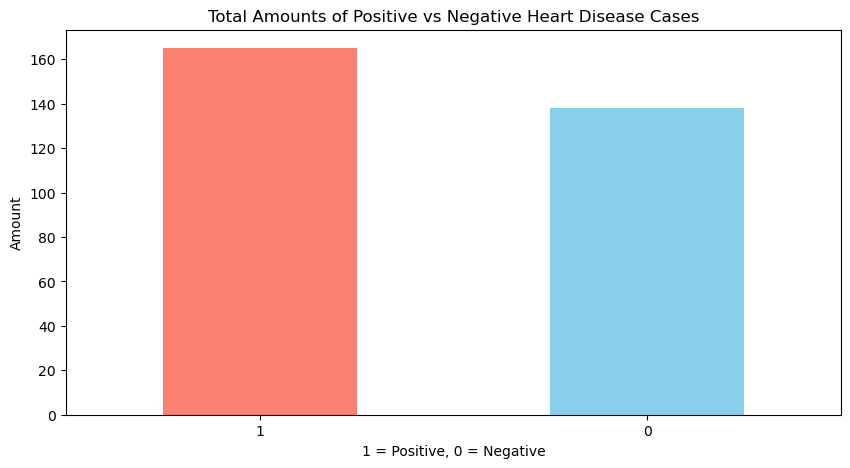

In [19]:
# Simple plot of target values
df.target.value_counts().plot(kind='bar', 
                              color=['salmon', 'skyblue'], 
                              title='Total Amounts of Positive vs Negative Heart Disease Cases', 
                              ylabel='Amount', 
                              xlabel='1 = Positive, 0 = Negative',
                              figsize=(10, 5));
plt.xticks(rotation=0);

#### Heart Disease frequency in Relation to Sex


In [20]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [21]:
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


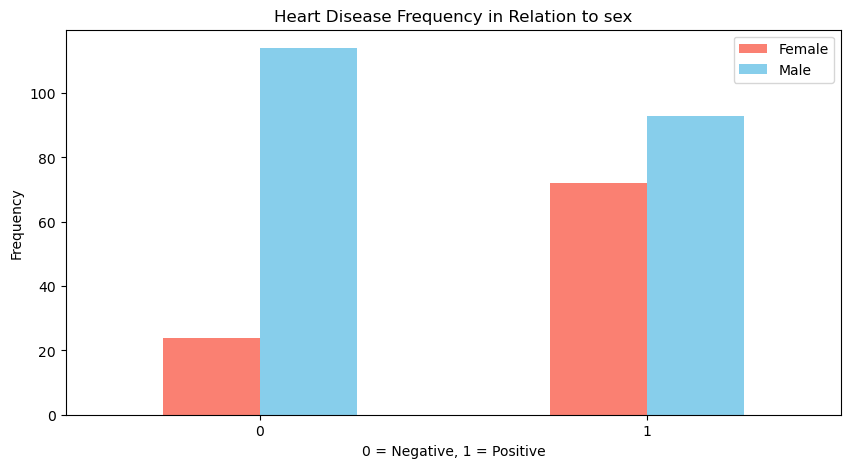

In [22]:
pd.crosstab(df.target, df.sex).plot(kind='bar', 
                                    color=['salmon', 'skyblue'], 
                                    ylabel='Frequency',
                                    xlabel='0 = Negative, 1 = Positive',
                                    title='Heart Disease Frequency in Relation to sex',
                                    figsize=(10, 5));
plt.legend(['Female', 'Male']);
plt.xticks(rotation=0);

#### Age vs. Max Heart Rate for Heart Disease  

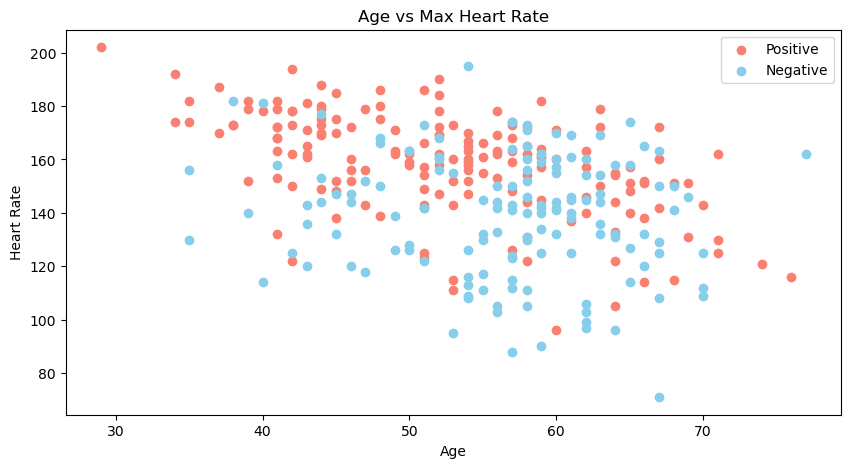

In [23]:
plt.figure(figsize=(10, 5))
plt.title('Age vs Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')

# Scatter with Positive examples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c='salmon');

# Scatter with Negative examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c='skyblue');

plt.legend(['Positive', 'Negative']);

#### Heart Disease Frequency per Chest Pain Type

In [73]:
data_dict["cp"]

'chest pain type ( 0.typical angina, 1.atypical angina, 2.non-anginal pain, 3.asymptomatic)'

In [24]:
cp_target  = pd.crosstab(df.cp, df.target)
cp_target

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


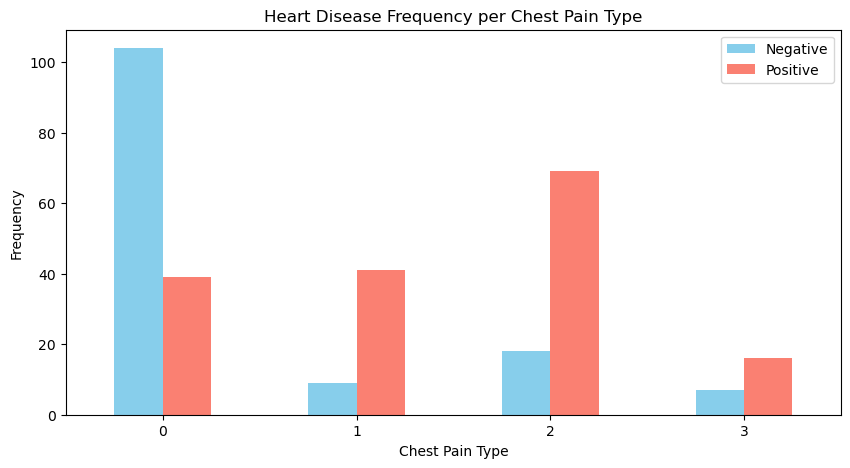

In [25]:
cp_target.plot(kind='bar', 
               color=['skyblue', 'salmon'],
               xlabel='Chest Pain Type',
               ylabel='Frequency',
               title='Heart Disease Frequency per Chest Pain Type',
               figsize=(10, 5));

plt.xticks(rotation=0)
plt.legend(['Negative','Positive']);

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Distributions of Age, Resting Blood Pressure, Cholestrol Levels and Max Heart Rate

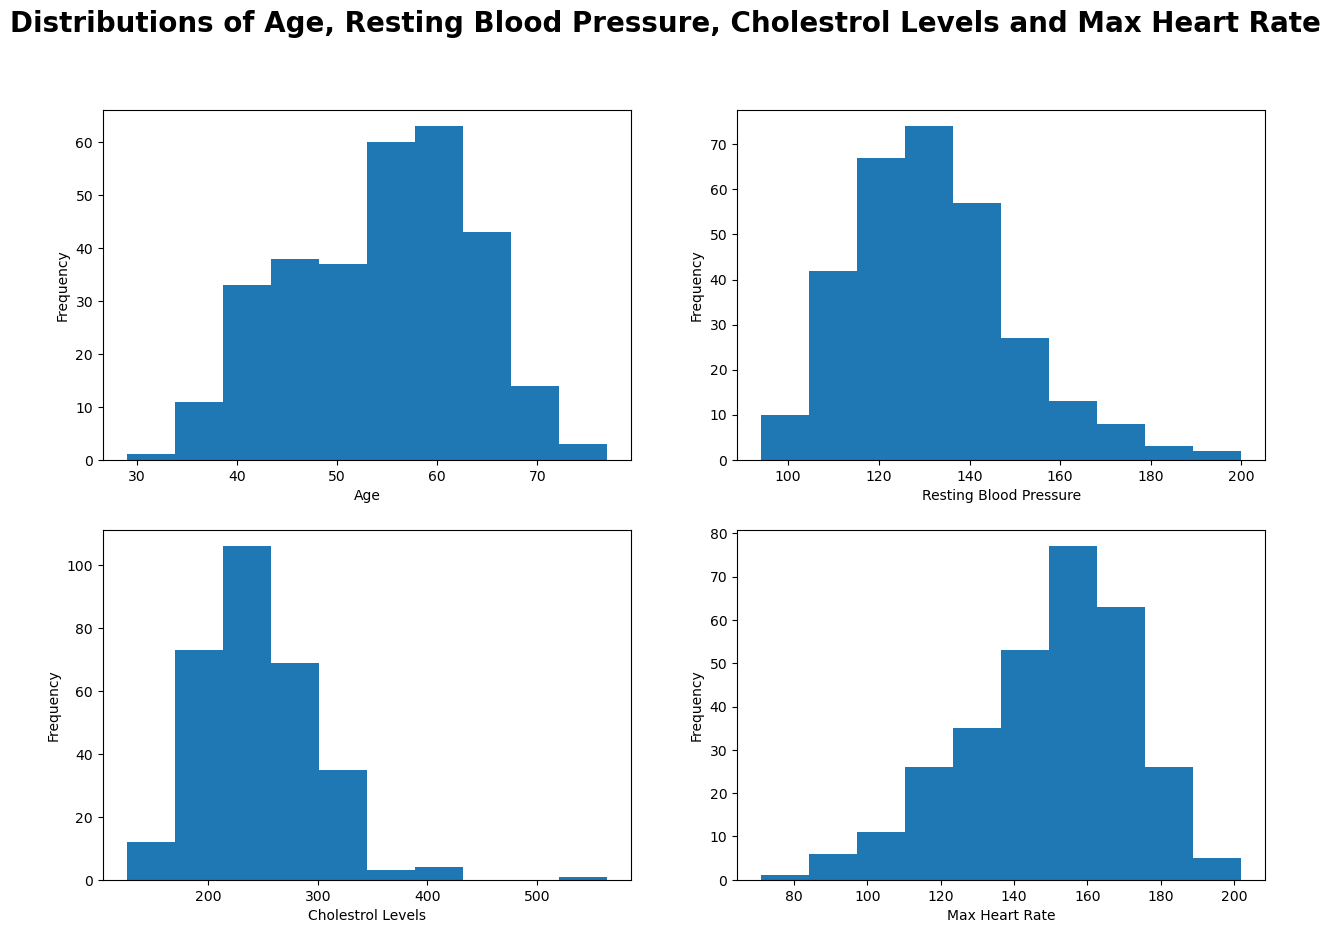

In [27]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Age
ax0.hist(df.age)
ax0.set_xlabel('Age')
ax0.set_ylabel('Frequency');

# Rest Blood Pressure
ax1.hist(df.trestbps)
ax1.set_xlabel('Resting Blood Pressure')
ax1.set_ylabel('Frequency');

# Cholestrol Levels
ax2.hist(df.chol)
ax2.set_xlabel('Cholestrol Levels')
ax2.set_ylabel('Frequency');

# Max Heart Rate
ax3.hist(df.thalach)
ax3.set_xlabel('Max Heart Rate')
ax3.set_ylabel('Frequency');

fig.suptitle('Distributions of Age, Resting Blood Pressure, Cholestrol Levels and Max Heart Rate',
             fontsize=20, 
             fontweight='bold');

#### Create and Visualize a Correlation Matrix

In [28]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [29]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


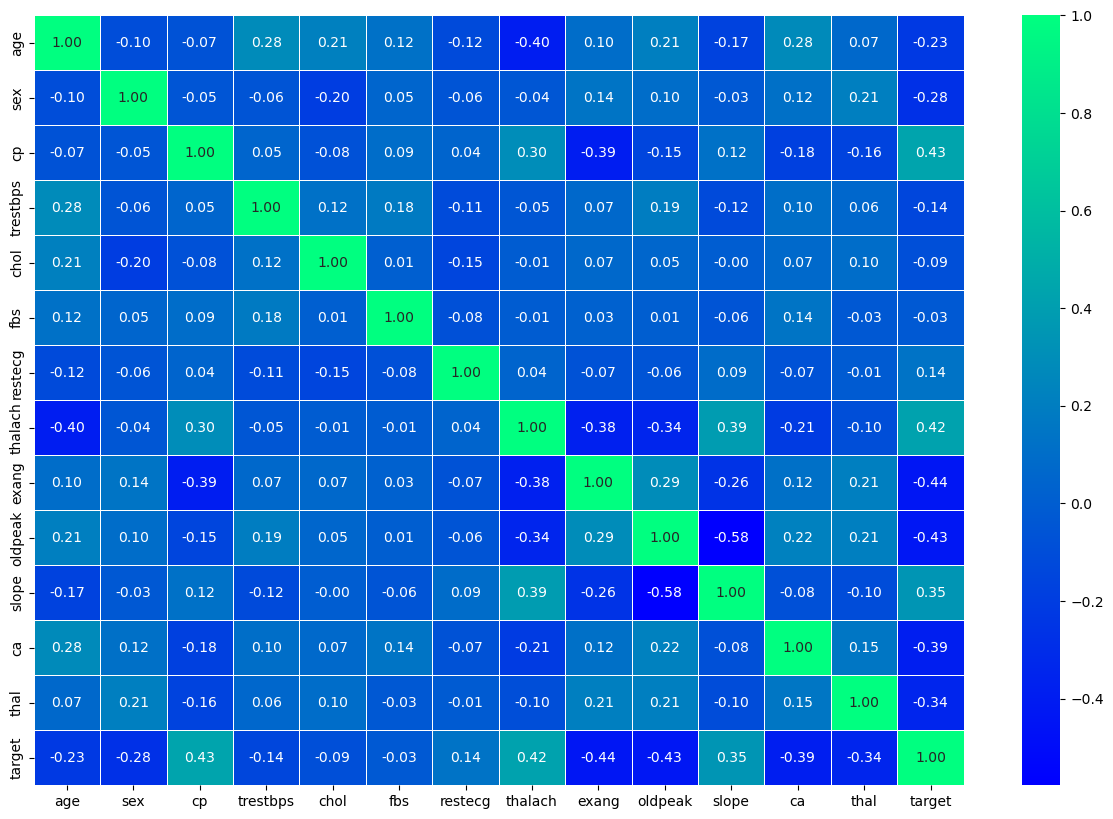

In [30]:
corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap='winter');

In [31]:
corr_matrix.shape

(14, 14)

## 5. Modelling

#### The data will be trained on 3 different classification models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

Baseline accuracy results will be obtained from all 3 models which will be used as reference for experimentation.

In [32]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
# Split data into features (X) and label (y)
X = df.drop('target', axis=1)
y = df.target

In [34]:
# Create train/test split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [102]:
# Create a dictionary with models inside
models = {"Logistic Regression": LogisticRegression(solver='newton-cg'),
          "KNN": KNeighborsClassifier(),
          "Random Forest Classifier": RandomForestClassifier(),
          "LinearSVC": LinearSVC(dual=False)}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: dict of sklearn classification models
    X_train: training data/features (no labels)
    X_test: testing data/features (no labels)
    y_train: training labels
    y_test: testing labels
    """
    np.random.seed(42)

    model_scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

#### Baseline Results

In [103]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

c:\Users\Tawanda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918,
 'LinearSVC': 0.8688524590163934}

#### Model Comparisons (Baseline Results)

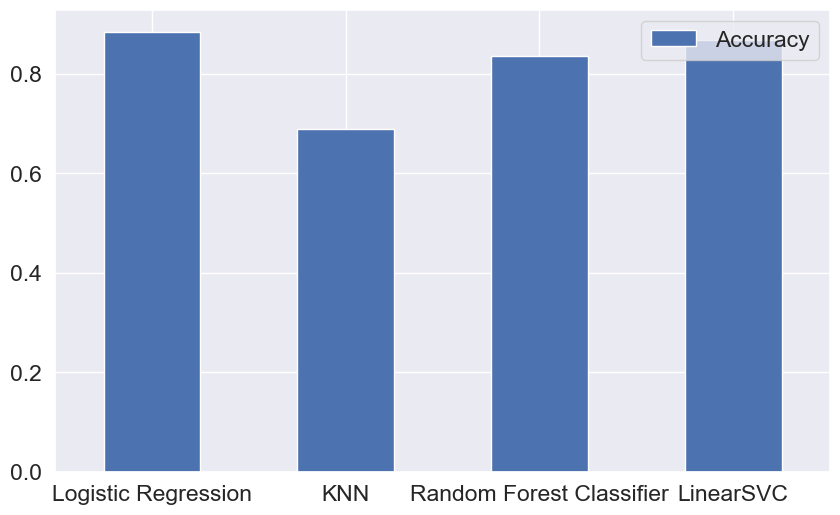

In [107]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare.T.plot(kind='bar', figsize=(10, 6))
plt.xticks(rotation=0);

In [108]:
model_compare

,Logistic Regression,KNN,Random Forest Classifier,LinearSVC
Accuracy,0.885246,0.688525,0.836066,0.868852


## 6. Experimentation 

After achieving baseline accuracy results, hyperparameter tuning will be done on the models to try and reach the highest possible accuracy score.



### Hyperparameter Tuning

#### Manually - KNN 

In [39]:
knn = KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
train_scores = []
test_scores = []

# Tune n_neighbors hyperparameter
neighbors = range(1, 21)

for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Append the train/test scores lists
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on test data: 75.41%


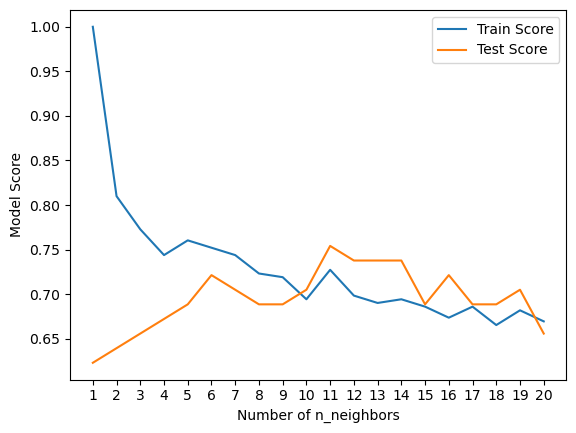

In [41]:
plt.plot(neighbors, train_scores, label='Train Score')
plt.plot(neighbors, test_scores, label='Test Score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of n_neighbors')
plt.ylabel('Model Score')
plt.legend();

print(f"Maximum KNN score on test data: {max(test_scores)*100:.2f}%")


#### KNN Performance Summary:
After manually tuning the hyperparameters for the KNN classification model, the maximum accuracy score was only 75.41%. This was a 6% increase in score from the baseline of 69% however the score is too low and potential for improvement beyond 80% seems minimal. Thus, hyperparamter tuning focus will now be on the Logistic Regression model as it showed a much higher baseline accuracy score of 88%. 

#### RandomizedSearchCV - Logistic Regression & Random Forest Classifier 

In [112]:
linear_svc = LinearSVC(dual=False)
linear_svc.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

##### Logistic Regression

In [42]:
log_reg = LogisticRegression()
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [43]:
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'newton-cg']
}

np.random.seed(42)

log_reg_rscv = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=log_reg_grid,
    n_iter=20,
    cv=5,
    verbose=1
)

log_reg_rscv.fit(X_train, y_train)
log_reg_rscv.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8852459016393442

In [44]:
log_reg_rscv.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

##### Random Forest Classifier

In [45]:
rf = RandomForestClassifier()
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [46]:
# estimators work better when numbers are sequenced that why np.arange() --> remove after note
rf_grid = {
    'n_estimators': np.arange(10, 1000, 50),
    'max_depth': [None, 3, 5 ,10], 
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2)
}

np.random.seed(42)

rf_rscv = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_grid,
    n_iter=50, 
    cv=5,
    verbose=1
)

rf_rscv.fit(X_train, y_train)
rf_rscv.score(X_test, y_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


0.8688524590163934

In [47]:
rf_rscv.best_params_

{'n_estimators': 260,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [110]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918,
 'LinearSVC': 0.8688524590163934}

#### GridSearchCV - Logistic Regression

In [49]:
log_reg_rscv.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [50]:
log_reg_grid_2 = {
    'C': np.logspace(-4, 4, 30),
    'solver': ['liblinear']
}

np.random.seed(42)

log_reg_gscv = GridSearchCV(
    estimator=log_reg,
    param_grid=log_reg_grid_2,
    cv=5,
    verbose=1
)

log_reg_gscv.fit(X_train, y_train)
log_reg_gscv.score(X_test, y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.8852459016393442

In [51]:
log_reg_gscv.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

## 7. Model Evaluation

To get a more in-depth look at the performance of the model, different classification evaluation metrics need to be determined. The most common metrics to evaluate on classification models are **accuracy, precision, recall and f1 score**. Other methods of evaluating classification models include:

1. Classification Report
    * A collection of different evaluation metrics such as precision, recall and f1 score.
2. Confusion Matrix
    * Comparisons of the labels the model predicted and the actual labels it was supposed to predict. 
3. ROC Curve
    * Compares a model's TPR (True Positive Rate) vs FPR (False Positive Rate)
4. AUC Score (Area Under Curve)

#### Prediction Variable

In [52]:
log_reg_gscv_preds = log_reg_gscv.predict(X_test)

#### Determine Prediction Accuracy

In [53]:
def get_preds(model):
    """
    Obtains prediction accuracy of model.
    model: estimator of which to obtain prediction accuracy
    """
    np.random.seed(42)

    y_preds = model.predict(X_test)

    np.array(y_test)
    mean_acc = np.mean(y_preds == y_test)

    print(f"Mean accuracy of predicted labels: {mean_acc * 100:.2f}%")

    return mean_acc

gscv_preds = get_preds(log_reg_gscv)

Mean accuracy of predicted labels: 88.52%


#### 1. Classification Report

In [54]:
# Classification report on single test dataset
gscv_report = classification_report(y_test, log_reg_gscv_preds)
print(gscv_report)


              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### Evaluating Metrics using Cross-Validation

In [55]:
log_reg_gscv.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [56]:
clf = LogisticRegression(
    C = 0.20433597178569418,
    solver = 'liblinear'
)

Accuracy:

In [57]:
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

Precision:

In [58]:
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

Recall:

In [59]:
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

F1:

In [60]:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

#### Visualization

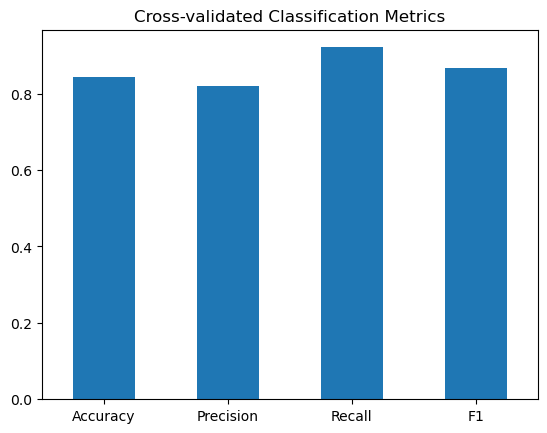

In [61]:
cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision": cv_precision,
    "Recall": cv_recall,
    "F1": cv_f1
}, index=[0])

cv_metrics.T.plot(
    kind='bar',
    title='Cross-validated Classification Metrics',
    legend=False
)
plt.xticks(rotation=0);

#### 2. Create Confusion Matrix

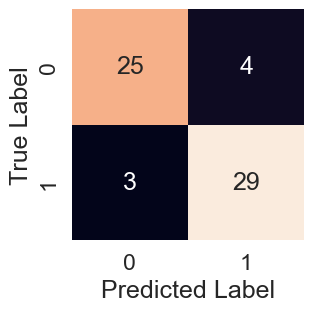

In [62]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    y_test: True labels.
    y_preds: Predicted labels.
    """

    confusion_mat = confusion_matrix(y_test, y_preds)
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(
        confusion_mat,
        annot=True,
        cbar=False
    )
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plot_conf_mat(y_test, log_reg_gscv_preds)

#### 3. ROC Curve
1. Get probabilities

In [63]:
def get_probs(model):
    """
    Gets probability scores of only positive (1) cases.
    models: estimator of which probability score will be determined.
    """
    y_probs = model.predict_proba(X_test)
    y_probs_positive = y_probs[:,1]

    return y_probs_positive

gscv_probs = get_probs(log_reg_gscv)
gscv_probs

array([0.13274726, 0.75591495, 0.81452422, 0.05469223, 0.88453356,
       0.87070297, 0.60512178, 0.00435981, 0.01376377, 0.56138458,
       0.71720802, 0.11904144, 0.88730101, 0.06005038, 0.9675006 ,
       0.93181123, 0.96404702, 0.09452761, 0.01769764, 0.02646362,
       0.71543138, 0.02727602, 0.14274672, 0.716608  , 0.88198278,
       0.69480591, 0.84234232, 0.69335557, 0.01830938, 0.8778237 ,
       0.0715076 , 0.06684154, 0.01510285, 0.14314492, 0.6022949 ,
       0.12640329, 0.6633502 , 0.85079082, 0.81898324, 0.84121546,
       0.54515819, 0.79250828, 0.7781759 , 0.70538843, 0.83243213,
       0.02112999, 0.73216372, 0.93234387, 0.10276675, 0.06440751,
       0.1347065 , 0.03554557, 0.8044197 , 0.95312793, 0.31714638,
       0.00309601, 0.0873472 , 0.93823574, 0.028138  , 0.01309874,
       0.06291751])

2. Get fpr, tpr and thresholds

In [64]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, gscv_probs)

3. Plot ROC Curve

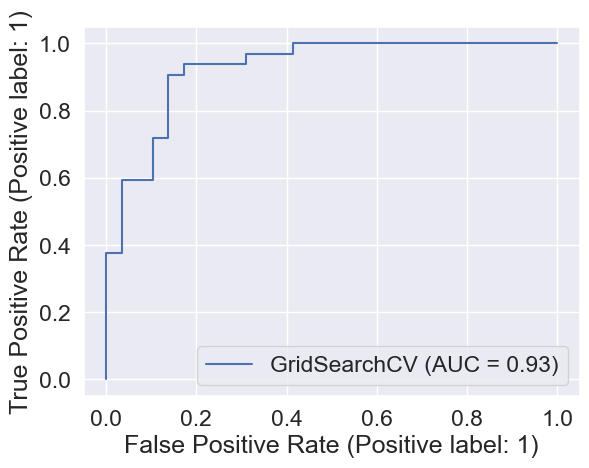

In [65]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(log_reg_gscv, X_test, y_test)

#### 4. AUC Score

In [66]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, gscv_probs)

0.925646551724138

## Feature Importance

Determining which features had the most contribution to the model outcome.

In [67]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [68]:
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [69]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

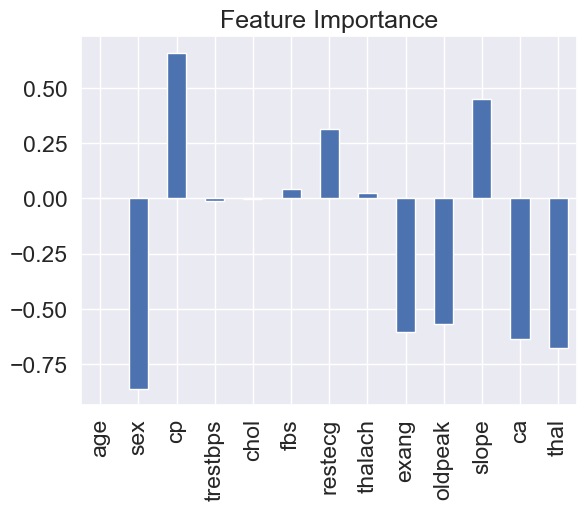

In [70]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', legend=False);


# Conclusion

For the project to be deemed a success, an accuracy score of 95% or above was required. However the model only managed to achieve a base accuracy score of 88.52% and a 5-fold cross-validated accuracy score of 84.4%. Thus, the project does not meet the success criteria. 

### Steps to improve results:

Certain steps and experimentation can be done in an attemp to increase these scores. They include the following:
* Collecting more data.
* Further hyperparameter tuning and expirementation.
* Implementing model XG Boost.
